In [7]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [8]:
df = pd.read_csv('xGTable.csv')

In [9]:
df.head()

,Squad,xG,xGA
0,Liverpool,54.1,23.0
1,Manchester City,51.5,16.0
2,Chelsea,40.8,22.1
3,Manchester Utd,31.9,32.9
4,Everton,24.6,28.1


In [11]:
df['path'] = df['Squad'] + '.png'
df.head()

,Squad,xG,xGA,path
0,Liverpool,54.1,23.0,Liverpool.png
1,Manchester City,51.5,16.0,Manchester City.png
2,Chelsea,40.8,22.1,Chelsea.png
3,Manchester Utd,31.9,32.9,Manchester Utd.png
4,Everton,24.6,28.1,Everton.png


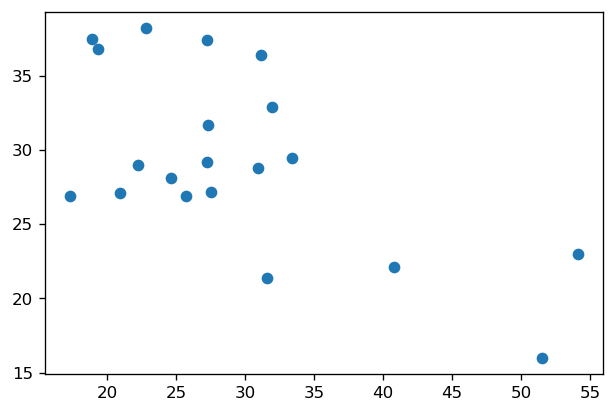

In [12]:
fig, ax = plt.subplots(figsize=(6,4), dpi=120)
ax.scatter(df['xG'], df['xGA'])

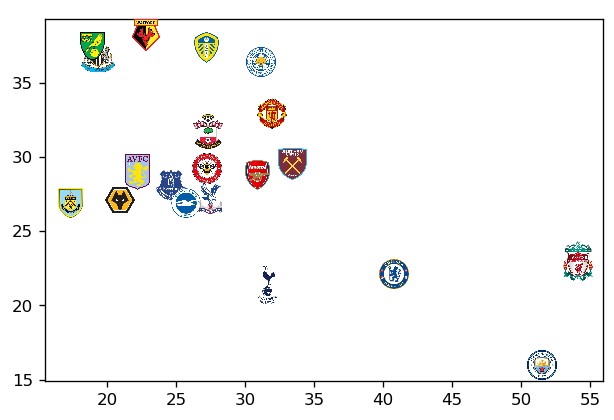

In [13]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(df['xG'], df['xGA'], color='white')

def getImage(path):
    return OffsetImage(plt.imread('images/' + path), zoom=.05, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['xG'], row['xGA']), frameon=False)
    ax.add_artist(ab)

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


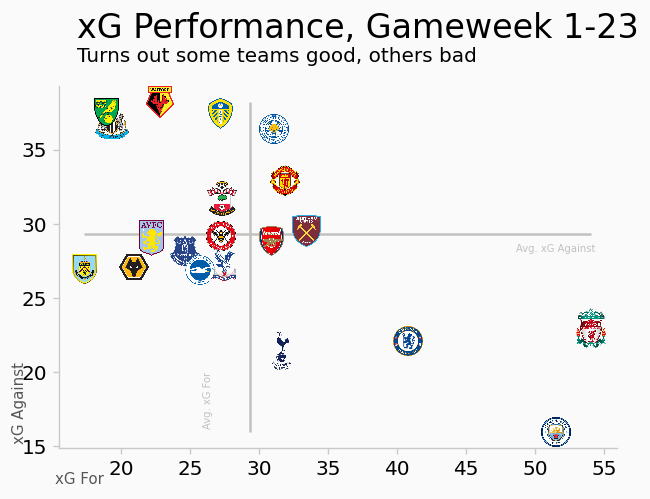

In [14]:
# Set font and background colour
plt.rcParams.update({'font.family':'Avenir'})
bgcol = '#fafafa'

# Create initial plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.scatter(df['xG'], df['xGA'], c=bgcol)

# Change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread('images/' + path), zoom=.05, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['xG'], row['xGA']), frameon=False)
    ax.add_artist(ab)

# Add average lines
plt.hlines(df['xGA'].mean(), df['xG'].min(), df['xG'].max(), color='#c2c1c0')
plt.vlines(df['xG'].mean(), df['xGA'].min(), df['xGA'].max(), color='#c2c1c0')

# Text

## Title & comment
fig.text(.15,.98,'xG Performance, Gameweek 1-23',size=20)
fig.text(.15,.93,'Turns out some teams good, others bad', size=12)

## Avg line explanation
fig.text(.06,.14,'xG Against', size=9, color='#575654',rotation=90)
fig.text(.12,0.05,'xG For', size=9, color='#575654')

## Axes titles
fig.text(.76,.535,'Avg. xG Against', size=6, color='#c2c1c0')
fig.text(.325,.17,'Avg. xG For', size=6, color='#c2c1c0',rotation=90)

## Save plot
plt.savefig('xGChart.png', dpi=1200, bbox_inches = "tight")